In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 로드

In [5]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S


### 데이터 타입 확인

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측처리

In [12]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Sex, Cabin, Embarked 칼럼 확인

In [16]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [20]:
# 첫 번째 문자만 저장
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [21]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [18]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

### 성별에 따른 생존확률

In [22]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

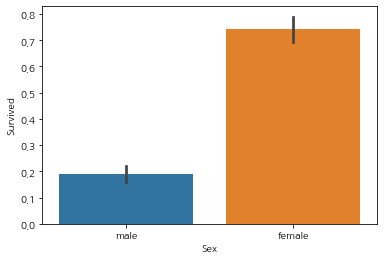

In [23]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

### 객실등급에 따른 생존확률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

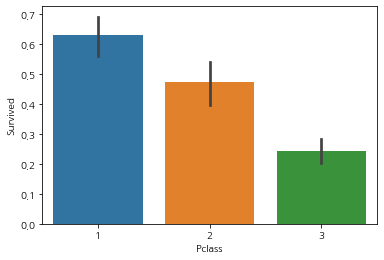

In [26]:
sns.barplot(data=titanic_df, x='Pclass', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

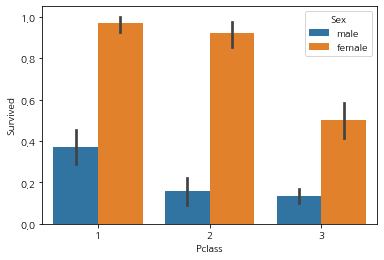

In [25]:
sns.barplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex')

### 나이에 따른 생존확률

In [31]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    return cat    

In [32]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

In [33]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult


In [41]:
plt.figure(figsize=(12,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

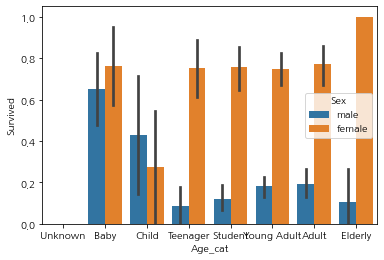

In [42]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

In [43]:
titanic_df.drop('Age_cat', axis=1, inplace=True)

### 문자열 카테고리 -> 숫자형

In [111]:
features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
    print(feature)

Cabin
Sex
Embarked


In [46]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [48]:
titanic_df = encode_features(titanic_df)

In [49]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


### 앞에 가공한 내용 전부 재사용위해 함수화

In [50]:
# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

### 원본 데이터 재로딩, 피처 데이터와 레이블 데이터 세트 추출

In [51]:
titanic_df = pd.read_csv('titanic_train.csv')

In [52]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [112]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [113]:
# 테스트 데이터 세트 추출

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [67]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [68]:
dt_pred = dt_clf.predict(X_test)

In [69]:
accuracy_score(y_test, dt_pred)

0.7877094972067039

In [70]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [71]:
rf_pred = rf_clf.predict(X_test)

In [72]:
accuracy_score(y_test, rf_pred)

0.8547486033519553

In [73]:
lr_clf.fit(X_train, y_train)

C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
lr_pred = lr_clf.predict(X_test)

In [75]:
accuracy_score(y_test, lr_pred)

0.8491620111731844

### 교차검증 KFold

In [76]:
from sklearn.model_selection import KFold

In [89]:
def exec_kfold(clf, folds=5):
    # 폴드 세트가 5인 KFold 객체 생성, 저장을 위한 리스트 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습, 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classfier 합습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {} 정확도: {:.4f}'.format(iter_count, accuracy))
    
    # 5개 fold에서 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균정확도 : {:.4f}'.format(mean_score))
    

In [90]:
# exec_kfold 호출
exec_kfold(dt_clf, 5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균정확도 : 0.7823


### cross_val_score 교차검증

In [94]:
from sklearn.model_selection import cross_val_score

In [97]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

In [98]:
scores

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [99]:
np.mean(scores)

0.7879291946519366

### GridSearchCV 검증

In [92]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [103]:
grid_dclf.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [104]:
grid_dclf.best_score_

0.7991825076332119

In [105]:
best_dclf = grid_dclf.best_estimator_

In [107]:
dpredictions = best_dclf.predict(X_test)

In [109]:
accuracy_score(y_test, dpredictions)

0.8715083798882681